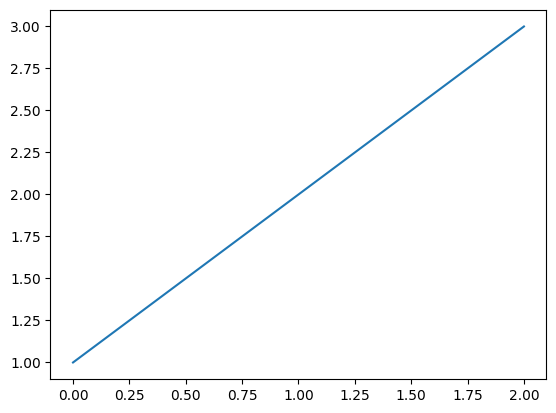

In [1]:

import os 
import matplotlib.pyplot as plt
plt.plot([1,2,3])
plt.show()

from NNforshow import *
import pandas as pd
import numpy as np
import random
import input_data
import pickle
import pandas as pd

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

current_file = os.path.abspath ('')
current_dir = os.path.dirname (current_file)
target_file = os.path.join (current_dir+"\\vision\\", "handmadecnn", "archive")
data = pd.read_csv(target_file+"\\housing.csv")
data = data.drop("ocean_proximity", axis=1).dropna()
data = (data - data.mean())/data.std()
Y = data["median_house_value"].to_numpy()*0.1
X = data.drop("median_house_value", axis=1).to_numpy()
X.shape
MAXNUM = 20433

# current_file = os.path.abspath ('')
# current_dir = os.path.dirname (current_file)
# target_file = os.path.join (current_dir+"\\vision\\", "handmadecnn", "archive")
# data = pd.read_csv(target_file+"\\winequality-white.csv", sep=";")

# data = (data - data.mean())/data.std()
# Y = data["quality"].to_numpy()*0.1
# X = data.drop("quality", axis=1).to_numpy()
# X.shape
# MAXNUM = 4898

X = torch.tensor(X).to(device)
Y = torch.tensor(Y).to(device)

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_with_values(models, dataset_name, num_layers, sample_size, precision=1):
    """
    Plot a line chart with data point values and save the results to a CSV file.

    Parameters:
    models (list): List of model objects containing 'testhis' data.
    dataset_name (str): Name of the dataset (e.g., "Wine Dataset").
    num_layers (int): Number of layers in the model.
    sample_size (int): Size of the training dataset.
    precision (int): Number of decimal places to display for data point values.
    """
    labels = [
        'Our Proposed Method',
        'Our Method with Stabilizer',
        'Baseline Method',
        'L2 Regularization (λ=0.01)',
        'L2 Regularization (λ=0.1)'
    ]
    
    x_values = range(len(models[0].testhis))  # Assuming x-axis is the epoch index
    csv_dict = {'Epoch': x_values}
    
    for i in range(len(models)):
        y = models[i].testhis
        plt.plot(x_values, y, label=labels[i])
        
        # Add data for CSV
        csv_dict[labels[i]] = y
        
        # Display data point values
        for j in range(len(y)):
            plt.text(x_values[j], y[j], f'{y[j]:.{precision}f}', ha='center', va='bottom')
    
    # Set the plot title and labels in English
    plt.title(f'Results on {dataset_name} Dataset with {num_layers} Layers and Sample Size {sample_size}')
    plt.xlabel('Training Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    # Save the data to a CSV file
    df = pd.DataFrame(csv_dict)
    safe_dataset_name = dataset_name.replace(' ', '_')
    csv_filename = f'{safe_dataset_name}_layers{num_layers}_samples{sample_size}.csv'
    df.to_csv(csv_filename, index=False)

    
def trainmodelset(modelset):
    for i in range(5):
        m = modelset.models[i]

        if i <3: #如果属于self.model_my, self.model_mystable, self.model_base
            error = modelset.train_step(m, X, Y)
        else: #如果属于self.model_L2light, self.model_L2heavy
            error = modelset.train_step_L2(m, X, Y)
        m.trainhis.append(error.item())

        error2 = modelset.test_step(m, X,Y)
        m.testhis.append(error2.item())

        print(i+1, error2)
        

In [3]:

inputn=8
nnumber1=20
nnumber2=1


model100 = Regression(MAXNUM, inputn, 100, device)
model100.build_model(2, inputn, nnumber1, nnumber2 )

In [4]:
for i in range(6):
    print("turn ", i)
    trainmodelset(model100)


turn  0
1 tensor(66.9464, device='cuda:0')
2 tensor(379.9005, device='cuda:0')
3 tensor(147.3619, device='cuda:0')
4 tensor(136.6457, device='cuda:0')
5 tensor(61.5973, device='cuda:0')
turn  1
1 tensor(54.7919, device='cuda:0')
2 tensor(55.0766, device='cuda:0')
3 tensor(102.0986, device='cuda:0')
4 tensor(84.9159, device='cuda:0')
5 tensor(78.6077, device='cuda:0')
turn  2
1 tensor(52.8718, device='cuda:0')
2 tensor(46.2948, device='cuda:0')
3 tensor(88.7182, device='cuda:0')
4 tensor(68.5987, device='cuda:0')
5 tensor(90.0172, device='cuda:0')
turn  3
1 tensor(50.1586, device='cuda:0')
2 tensor(43.6592, device='cuda:0')
3 tensor(80.1346, device='cuda:0')
4 tensor(57.8094, device='cuda:0')
5 tensor(99.0326, device='cuda:0')
turn  4
1 tensor(49.9035, device='cuda:0')
2 tensor(42.7764, device='cuda:0')
3 tensor(76.0743, device='cuda:0')
4 tensor(54.0309, device='cuda:0')
5 tensor(99.9323, device='cuda:0')
turn  5
1 tensor(47.5989, device='cuda:0')
2 tensor(43.1991, device='cuda:0')
3 t

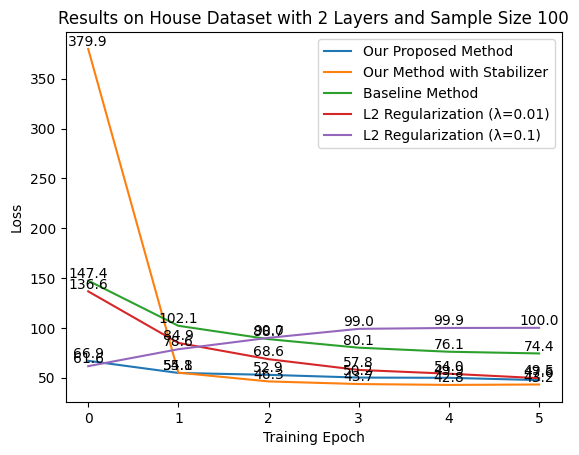

In [15]:
plot_with_values(model100.models, "House", 2, 100)


In [8]:
for i in range(5):
    m = model100.models[i]
    print( i, model100.test_step_noise(m, X ,Y) )

0 tensor(57.5621, device='cuda:0')
1 tensor(51.7298, device='cuda:0')
2 tensor(147.8642, device='cuda:0')
3 tensor(69.7758, device='cuda:0')
4 tensor(100.0499, device='cuda:0')


In [10]:
model500 = Regression(MAXNUM, inputn, 500, device)
model500.build_model(2, inputn, nnumber1, nnumber2 )

In [11]:
for i in range(6):
    print("turn ", i)
    trainmodelset(model500)


turn  0
1 tensor(70.9132, device='cuda:0')
2 tensor(306.8904, device='cuda:0')
3 tensor(241.8628, device='cuda:0')
4 tensor(203.6612, device='cuda:0')
5 tensor(68.2842, device='cuda:0')
turn  1
1 tensor(52.2367, device='cuda:0')
2 tensor(69.2709, device='cuda:0')
3 tensor(136.9326, device='cuda:0')
4 tensor(114.6628, device='cuda:0')
5 tensor(97.0965, device='cuda:0')
turn  2
1 tensor(49.0459, device='cuda:0')
2 tensor(44.6686, device='cuda:0')
3 tensor(100.6420, device='cuda:0')
4 tensor(77.4997, device='cuda:0')
5 tensor(100.1556, device='cuda:0')
turn  3
1 tensor(47.9746, device='cuda:0')
2 tensor(41.0211, device='cuda:0')
3 tensor(84.5855, device='cuda:0')
4 tensor(61.4111, device='cuda:0')
5 tensor(100.1659, device='cuda:0')
turn  4
1 tensor(48.5716, device='cuda:0')
2 tensor(39.6917, device='cuda:0')
3 tensor(73.4661, device='cuda:0')
4 tensor(52.5165, device='cuda:0')
5 tensor(100.7170, device='cuda:0')
turn  5
1 tensor(47.7380, device='cuda:0')
2 tensor(39.5966, device='cuda:0'

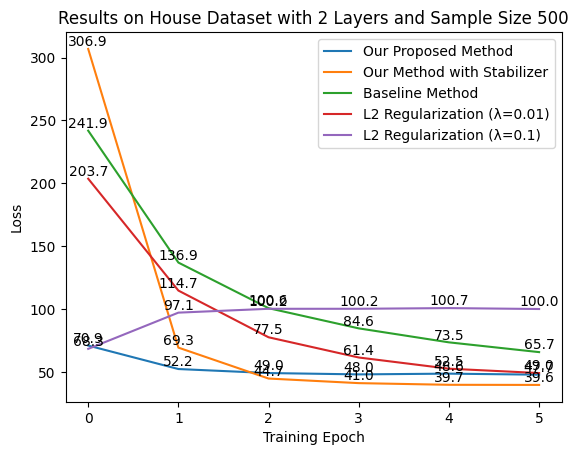

In [14]:
plot_with_values(model500.models, "House", 2, 500)


In [13]:
for i in range(5):
    m = model500.models[i]
    print( i, model500.test_step_noise(m, X ,Y) )

0 tensor(56.1682, device='cuda:0')
1 tensor(47.6749, device='cuda:0')
2 tensor(158.9420, device='cuda:0')
3 tensor(73.8087, device='cuda:0')
4 tensor(99.9804, device='cuda:0')


In [ ]:
# 1000

In [16]:
model1000 = Regression(MAXNUM, inputn, 1000, device)
model1000.build_model(2, inputn, nnumber1, nnumber2 )

In [17]:
for i in range(6):
    print("turn ", i)
    trainmodelset(model1000)


turn  0
1 tensor(70.0773, device='cuda:0')
2 tensor(189.6121, device='cuda:0')
3 tensor(139.0011, device='cuda:0')
4 tensor(122.6784, device='cuda:0')
5 tensor(90.2852, device='cuda:0')
turn  1
1 tensor(57.0822, device='cuda:0')
2 tensor(60.5166, device='cuda:0')
3 tensor(86.1774, device='cuda:0')
4 tensor(72.5077, device='cuda:0')
5 tensor(97.6878, device='cuda:0')
turn  2
1 tensor(53.3197, device='cuda:0')
2 tensor(46.2346, device='cuda:0')
3 tensor(69.5017, device='cuda:0')
4 tensor(59.9044, device='cuda:0')
5 tensor(99.3082, device='cuda:0')
turn  3
1 tensor(51.6520, device='cuda:0')
2 tensor(42.3436, device='cuda:0')
3 tensor(60.3924, device='cuda:0')
4 tensor(54.9053, device='cuda:0')
5 tensor(99.7813, device='cuda:0')
turn  4
1 tensor(50.0399, device='cuda:0')
2 tensor(39.7780, device='cuda:0')
3 tensor(57.0536, device='cuda:0')
4 tensor(54.1415, device='cuda:0')
5 tensor(100.0526, device='cuda:0')
turn  5
1 tensor(49.4633, device='cuda:0')
2 tensor(38.1335, device='cuda:0')
3 t

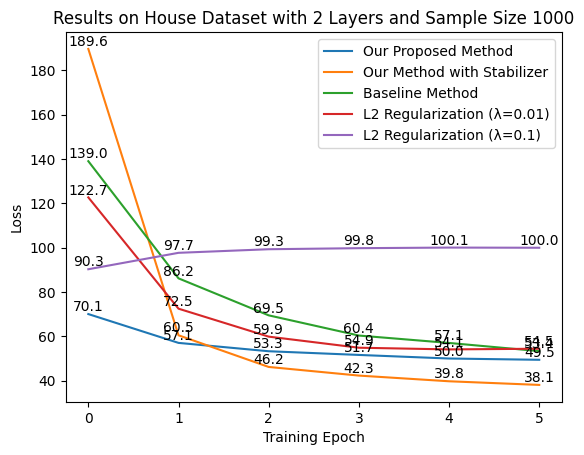

In [18]:
plot_with_values(model1000.models, "House", 2, 1000)


In [19]:
for i in range(5):
    m = model1000.models[i]
    print( i, model1000.test_step_noise(m, X ,Y) )

0 tensor(58.3389, device='cuda:0')
1 tensor(46.0605, device='cuda:0')
2 tensor(83.4333, device='cuda:0')
3 tensor(62.9623, device='cuda:0')
4 tensor(99.9720, device='cuda:0')


In [ ]:
# bigger

In [21]:

inputn=8
nnumber1=64
nnumber2=32
nnumber3=1


model100 = Regression(MAXNUM, inputn, 100, device)
model100.build_model(3, inputn, nnumber1, nnumber2 ,nnumber3)

In [22]:
for i in range(6):
    print("turn ", i)
    trainmodelset(model100)


turn  0
1 tensor(86.3627, device='cuda:0')
2 tensor(159.4748, device='cuda:0')
3 tensor(243.0779, device='cuda:0')
4 tensor(208.2152, device='cuda:0')
5 tensor(57.0287, device='cuda:0')
turn  1
1 tensor(63.3918, device='cuda:0')
2 tensor(67.3090, device='cuda:0')
3 tensor(207.1955, device='cuda:0')
4 tensor(160.9606, device='cuda:0')
5 tensor(60.9011, device='cuda:0')
turn  2
1 tensor(56.8952, device='cuda:0')
2 tensor(46.2652, device='cuda:0')
3 tensor(189.8845, device='cuda:0')
4 tensor(120.3037, device='cuda:0')
5 tensor(70.9226, device='cuda:0')
turn  3
1 tensor(52.3379, device='cuda:0')
2 tensor(42.2446, device='cuda:0')
3 tensor(181.9210, device='cuda:0')
4 tensor(100.6289, device='cuda:0')
5 tensor(76.7631, device='cuda:0')
turn  4
1 tensor(51.6688, device='cuda:0')
2 tensor(41.9802, device='cuda:0')
3 tensor(171.9265, device='cuda:0')
4 tensor(85.5132, device='cuda:0')
5 tensor(94.9095, device='cuda:0')
turn  5
1 tensor(49.5067, device='cuda:0')
2 tensor(43.0595, device='cuda:0

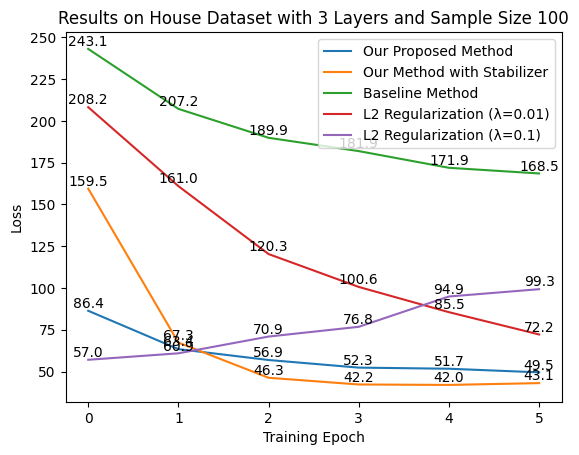

In [23]:
plot_with_values(model100.models, "House", 3, 100)


In [24]:
for i in range(5):
    m = model100.models[i]
    print( i, model100.test_step_noise(m, X ,Y) )

0 tensor(63.0199, device='cuda:0')
1 tensor(51.7741, device='cuda:0')
2 tensor(285.9675, device='cuda:0')
3 tensor(104.3713, device='cuda:0')
4 tensor(99.2772, device='cuda:0')


In [ ]:
# 500

In [25]:
model500 = Regression(MAXNUM, inputn, 500, device)
model500.build_model(3, inputn, nnumber1, nnumber2,nnumber3 )

In [26]:
for i in range(6):
    print("turn ", i)
    trainmodelset(model500)


turn  0
1 tensor(51.8412, device='cuda:0')
2 tensor(66.8902, device='cuda:0')
3 tensor(102.4739, device='cuda:0')
4 tensor(77.2514, device='cuda:0')
5 tensor(69.7850, device='cuda:0')
turn  1
1 tensor(41.7334, device='cuda:0')
2 tensor(37.8034, device='cuda:0')
3 tensor(69.4197, device='cuda:0')
4 tensor(55.0365, device='cuda:0')
5 tensor(89.2526, device='cuda:0')
turn  2
1 tensor(39.9311, device='cuda:0')
2 tensor(35.6495, device='cuda:0')
3 tensor(59.7949, device='cuda:0')
4 tensor(44.4196, device='cuda:0')
5 tensor(98.6748, device='cuda:0')
turn  3
1 tensor(38.6290, device='cuda:0')
2 tensor(35.7510, device='cuda:0')
3 tensor(54.9910, device='cuda:0')
4 tensor(41.0575, device='cuda:0')
5 tensor(100.1665, device='cuda:0')
turn  4
1 tensor(38.9430, device='cuda:0')
2 tensor(36.4379, device='cuda:0')
3 tensor(52.3124, device='cuda:0')
4 tensor(39.1158, device='cuda:0')
5 tensor(100.6035, device='cuda:0')
turn  5
1 tensor(38.6517, device='cuda:0')
2 tensor(37.4704, device='cuda:0')
3 te

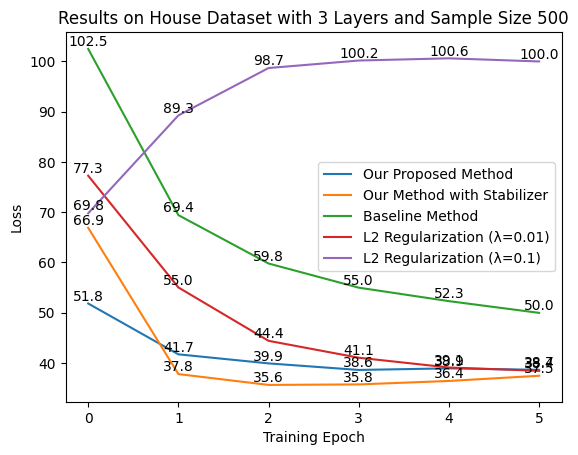

In [27]:
plot_with_values(model500.models, "House", 3, 500)


In [28]:
for i in range(5):
    m = model500.models[i]
    print( i, model500.test_step_noise(m, X ,Y) )

0 tensor(54.4808, device='cuda:0')
1 tensor(46.0647, device='cuda:0')
2 tensor(107.8725, device='cuda:0')
3 tensor(57.5630, device='cuda:0')
4 tensor(99.9823, device='cuda:0')


In [ ]:
#1000

In [29]:
model1000 = Regression(MAXNUM, inputn, 1000, device)
model1000.build_model(3, inputn, nnumber1, nnumber2 ,nnumber3)

In [30]:
for i in range(6):
    print("turn ", i)
    trainmodelset(model1000)


turn  0
1 tensor(52.3328, device='cuda:0')
2 tensor(86.1741, device='cuda:0')
3 tensor(96.0928, device='cuda:0')
4 tensor(82.9697, device='cuda:0')
5 tensor(68.8413, device='cuda:0')
turn  1
1 tensor(44.4831, device='cuda:0')
2 tensor(41.7819, device='cuda:0')
3 tensor(68.3510, device='cuda:0')
4 tensor(55.6101, device='cuda:0')
5 tensor(98.1497, device='cuda:0')
turn  2
1 tensor(41.5717, device='cuda:0')
2 tensor(36.0670, device='cuda:0')
3 tensor(58.5643, device='cuda:0')
4 tensor(47.1908, device='cuda:0')
5 tensor(99.6549, device='cuda:0')
turn  3
1 tensor(40.2700, device='cuda:0')
2 tensor(35.3314, device='cuda:0')
3 tensor(52.1094, device='cuda:0')
4 tensor(41.2854, device='cuda:0')
5 tensor(99.8260, device='cuda:0')
turn  4
1 tensor(40.1246, device='cuda:0')
2 tensor(36.4560, device='cuda:0')
3 tensor(48.0261, device='cuda:0')
4 tensor(39.3073, device='cuda:0')
5 tensor(100.0401, device='cuda:0')
turn  5
1 tensor(44.6218, device='cuda:0')
2 tensor(36.3328, device='cuda:0')
3 tens

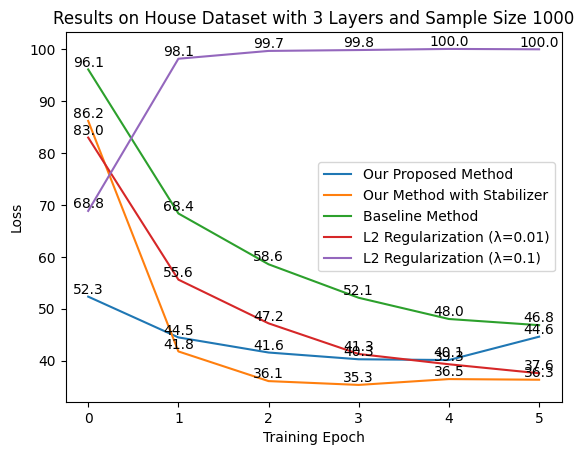

In [31]:
plot_with_values(model1000.models, "House", 3, 1000)


In [32]:
for i in range(5):
    m = model1000.models[i]
    print( i, model1000.test_step_noise(m, X ,Y) )

0 tensor(57.2738, device='cuda:0')
1 tensor(45.1498, device='cuda:0')
2 tensor(83.5051, device='cuda:0')
3 tensor(53.6968, device='cuda:0')
4 tensor(99.9673, device='cuda:0')
